In [164]:
import pandas as pd
from pandas import DataFrame, Series

import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [219]:
#df1 = pd.read_csv('dems.csv')
#df = df1[['created_at','tweet','user']]
df = pd.read_csv('candidates.csv')

#df = df.append(cand)
df['user'].nunique()

3903

In [220]:
#creating original_creator 
def original(tweet): 
    if tweet.split()[0] == 'RT': 
        return tweet.split()[1][1:-1]
    return 'AAA' 

df['original_creator'] = df['tweet'].map(original)

def retweet(tweet): 
    if tweet.split()[0] == 'RT': 
        return 1
    return 0 

df['retweet'] = df['tweet'].map(retweet)

def get_tweets(tweet):
    sentence = " "
    new_tweet = tweet.split()[2:]
    for x in new_tweet:
        x = x + ' '
        sentence += x
    return sentence 

df['tweet'] = df['tweet'].map(get_tweets)


In [221]:
t = df
ori = t[t['original_creator'] == 'AAA']
rt = t[t['original_creator'] != 'AAA']

ori['original_creator'] = ori['user']
ori_and_rt = ori.append(rt)

In [222]:
df2 = ori_and_rt.copy()
df2['original_creator'].nunique()

1315

In [243]:
degrees = df2['original_creator'].value_counts()[:200].index
def degree_filter(name): 
    if name in degrees: 
        return 1 
    return 0 

df2['degrees'] = df2['original_creator'].map(degree_filter)
df2 = df2[df2['degrees'] == 1]

Network Structure

In [244]:
import networkx as nx
# Create retweet network from edgelist
network = nx.from_pandas_edgelist(
    df2,
    source = 'user', 
    target = 'original_creator',
    create_using = nx.DiGraph())

In [245]:
def assign_candidate(tweet): 
    tweet = tweet.lower()
    if '#berniesanders'in tweet: 
        return 1.25
    if '#joebiden'in tweet: 
        return 1.0
    if '#mikebloomberg'in tweet: 
        return .75
    if '#petebuttigieg'in tweet: 
        return .5
    if '#elizabethwarren' in tweet: 
        return 1.25
    return 0.0

df2['value'] = df2['tweet'].map(assign_candidate)

In [246]:
val_map = dict(zip(df2.user, df2.value))
values = [val_map.get(node, .25) for node in network.nodes()]

In [247]:
print('Nodes in RT network:', len(network.nodes()))
print('Edges in RT network:', len(network.edges()))

Nodes in RT network: 2743
Edges in RT network: 2915


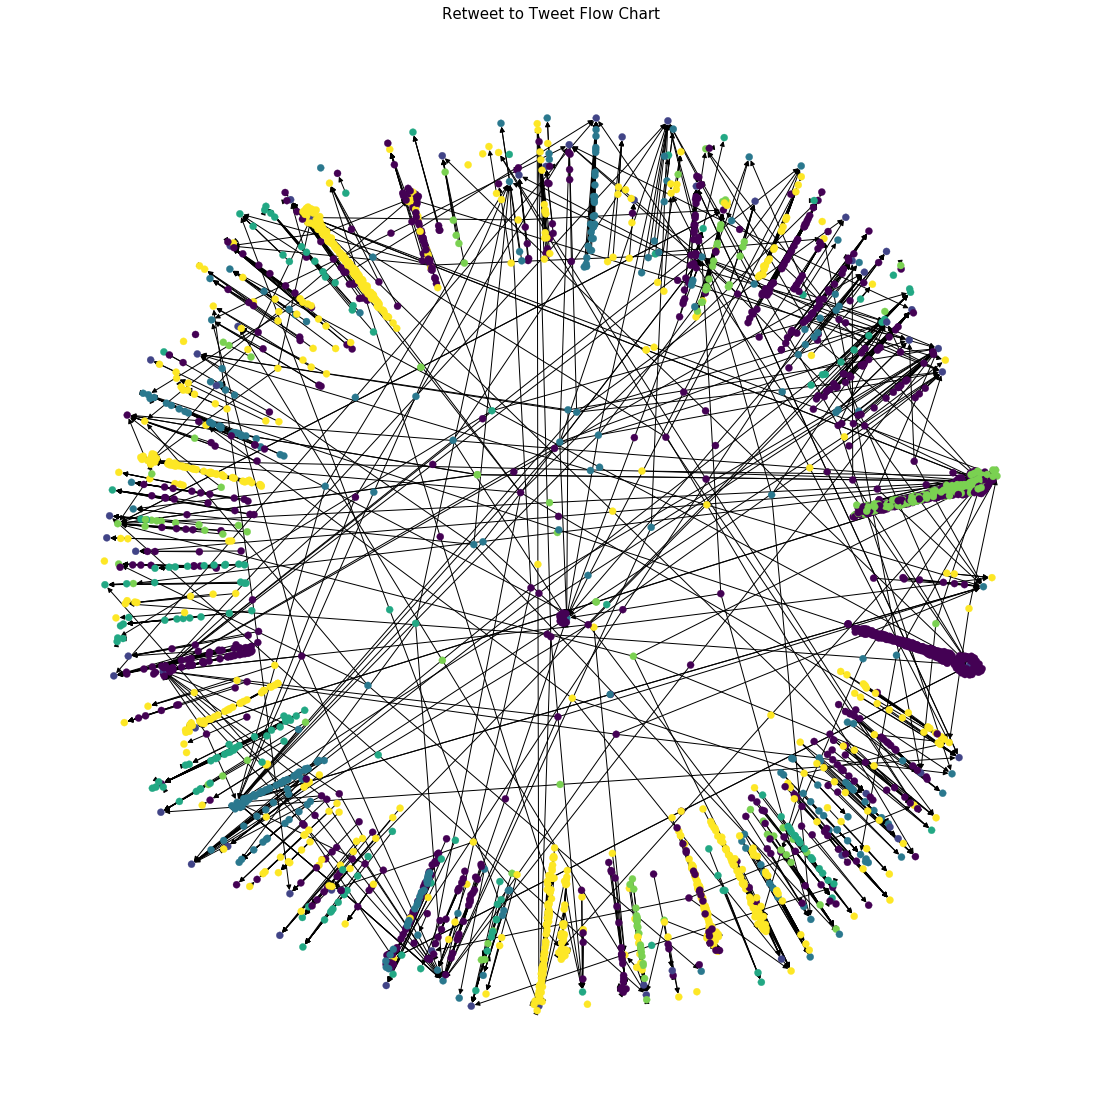

In [249]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 15))
nx.draw(network, edge_color ="black", linewidths=0.3, node_size=50, cmap=plt.get_cmap('viridis'),node_color=values)
plt.title('Retweet to Tweet Flow Chart', size=15)
plt.show()

Network Centrality, closeness, and betweeness

In [250]:
graph_centrality = nx.degree_centrality(network)
sorted_cent = sorted(graph_centrality.items(), key=lambda x: x[1], reverse=True)
DataFrame(sorted_cent).head()

,0,1
0,SallyDeal4,0.107586
1,larryelder,0.096280
2,mayawiley,0.061634
3,ResisterSis20,0.053975
4,FIGHT_2_KAG,0.029905


In [251]:
graph_closeness = nx.closeness_centrality(network)
sorted_closeness = sorted(graph_closeness.items(), key=lambda x: x[1], reverse=True)
DataFrame(sorted_closeness).head()

,0,1
0,SallyDeal4,0.106511
1,larryelder,0.096280
2,ResisterSis20,0.093567
3,mayawiley,0.061634
4,FIGHT_2_KAG,0.029176


In [252]:
graph_betweenness = nx.betweenness_centrality(network, normalized=True, endpoints=False)
sorted_bet=sorted(graph_betweenness.items(), key=lambda x: x[1], reverse=True)[:50]

In [253]:
df2['closeness'] = df['original_creator'].map(graph_closeness)
df2['centrality'] = df['original_creator'].map(graph_centrality)
df2['betweeness']=df['original_creator'].map(graph_betweenness)


In [254]:
df2.sort_values(by = 'betweeness').head()

,Unnamed: 0,user,location,tweet,created_at,original_creator,retweet,value,degrees,closeness,centrality,betweeness
0,0,TeamKAG2020,America,"Okay, this says it all. For all you #BernieSa...",2020-02-19 22:25:39,FIGHT_2_KAG,1,1.25,1,0.029176,0.029905,0.0
3166,277,CountryMamaRose,NaN,#PeteButtigieg doesn't get the news coverage ...,2020-02-19 19:18:21,youcantbeatpete,1,0.50,1,0.022611,0.023341,0.0
3167,278,KelseyM53339643,NaN,Out of the candidates out there Mayor Pete is...,2020-02-19 19:17:59,christo37105031,1,0.00,1,0.007182,0.004376,0.0
3168,279,RTerriers,Flyovercountry,"""South Bend residents warn 'inept' Buttigieg ...",2020-02-19 19:17:21,snowball1926,1,0.50,1,0.010212,0.010941,0.0
3169,280,GryphonsRAWK,"Chicago, IL","""South Bend residents warn 'inept' Buttigieg ...",2020-02-19 19:16:52,snowball1926,1,0.50,1,0.010212,0.010941,0.0


In [255]:
a_list = []
for x in range(0,len(sorted_bet)): 
    b = str(sorted_cent[x][0])
    a_list.append(b)

In [256]:
def v(name): 
    if name in a_list: 
        return 1 
    return 0 

one_two = df['original_creator'].map(v)
df['top_50'] = one_two
top = df[df['top_50'] == 1]

In [258]:
non_duplicates = df2['original_creator'].value_counts()
df3=df2[df2['original_creator'].isin(non_duplicates[non_duplicates].index)]

IndexError: index 335 is out of bounds for axis 0 with size 200

In [ ]:
# Create retweet network from edgelist
G_rt1 = nx.from_pandas_edgelist(
    df3,
    source = 'user', 
    target = 'original_creator',
    create_using = nx.DiGraph())
    
# Print the number of nodes
print('Nodes in RT network:', len(G_rt1.nodes()))

# Print the number of edges
print('Edges in RT network:', len(G_rt1.edges()))

import matplotlib.pyplot as plt
plt.figure(figsize=(20, 20))
nx.draw(G_rt1, node_color="red", cmap=plt.cm.PiYG, edge_color="black", linewidths=0.3, node_size=60, alpha=0.6, with_labels=False)
plt.title('Retweet to Tweet Flow Chart', size=20)
plt.show()